## Overall Prediction Observation

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def compute_rmse(actual, predicted):
    return np.sqrt(((actual - predicted) ** 2).mean())

def compute_mape(actual, predicted):
    return 100 * np.mean(np.abs((actual - predicted) / actual))

In [15]:
IS_FILTERED = True

# Load data
datafile = 'prediction_result_filtered.csv' if IS_FILTERED else 'prediction_result.csv'
dir = '../source/'

def load_data(layer: str):
    dir = '../source/' + layer + '_prediction_dataset/' + datafile
    df = pd.read_csv(dir)
    df['Time'] = pd.to_datetime(df['Time'])
    df['FormattedTime'] = df['Time'].dt.strftime('%H:%M:%S')
    df = df.sort_values(by='FormattedTime')
    return df

dfs = {
    'l1': load_data('l1'),
    'l2': load_data('l2'),
    'l3': load_data('l3'),
}

# Indicate which columns to ignore
IGNORED_COLS = ['Time', 'FormattedTime', 'Actual'] 
if IS_FILTERED: IGNORED_COLS.append('Raw')

In [16]:
# Count row of l3
l3_row_count = dfs['l3'].shape[0]

# Update length l1 to have same length as l3 (= l2)
dfs['l1'] = dfs['l1'].iloc[-l3_row_count:]

In [17]:
for key, df in dfs.items():
    # Compute RMSE and MAPE for each model
    print("Layer", key)
    for column in df.columns:
        if column not in IGNORED_COLS:
            actual = df['Raw'] if IS_FILTERED else df['Actual']
            rmse = compute_rmse(actual, df[column])
            mape = compute_mape(actual, df[column])
            print(f"{column} - RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")
    print("------------------")

Layer l1
ARIMA - RMSE: 0.0470, MAPE: 29.45%
ETS - RMSE: 0.0501, MAPE: 30.62%
LSTM - RMSE: 0.0447, MAPE: 28.63%
------------------
Layer l2
RIDGE_REGRESSION - RMSE: 0.0473, MAPE: 31.02%
RANDOM_FOREST - RMSE: 0.0476, MAPE: 29.53%
FEEDFORWARD_NEURAL_NETWORK - RMSE: 0.0557, MAPE: 39.54%
------------------
Layer l3
Predicted - RMSE: 0.0476, MAPE: 31.98%
------------------


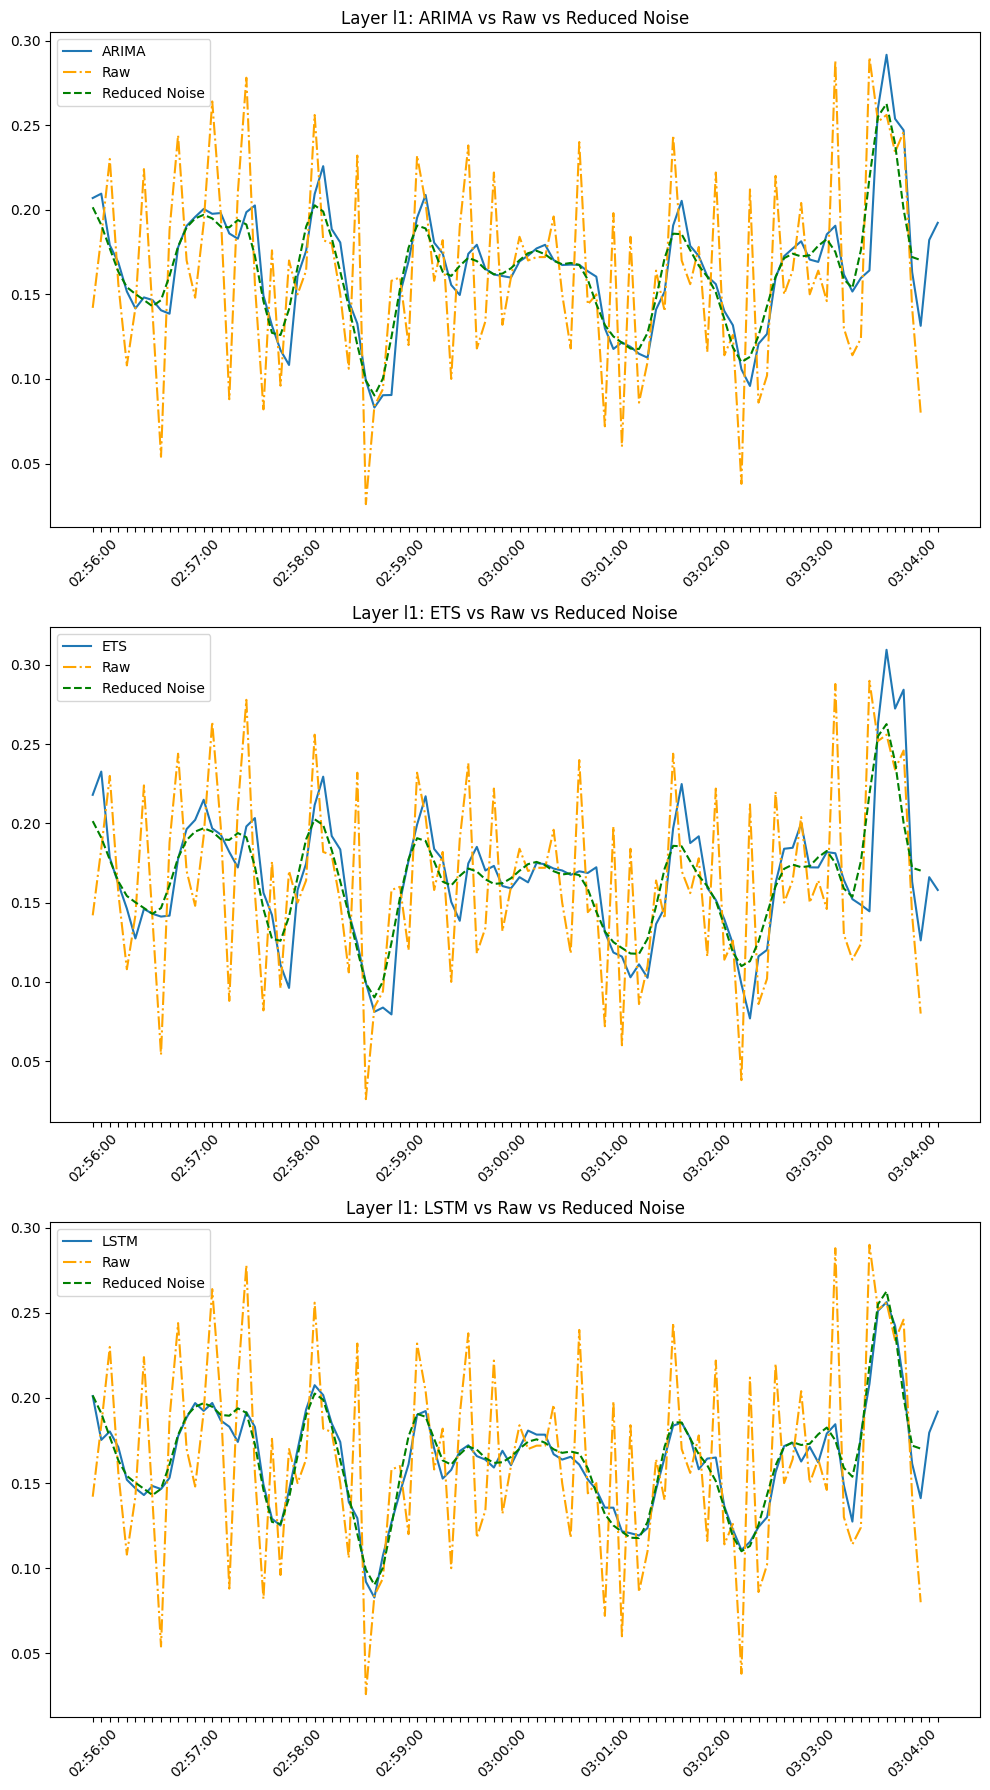

------------------


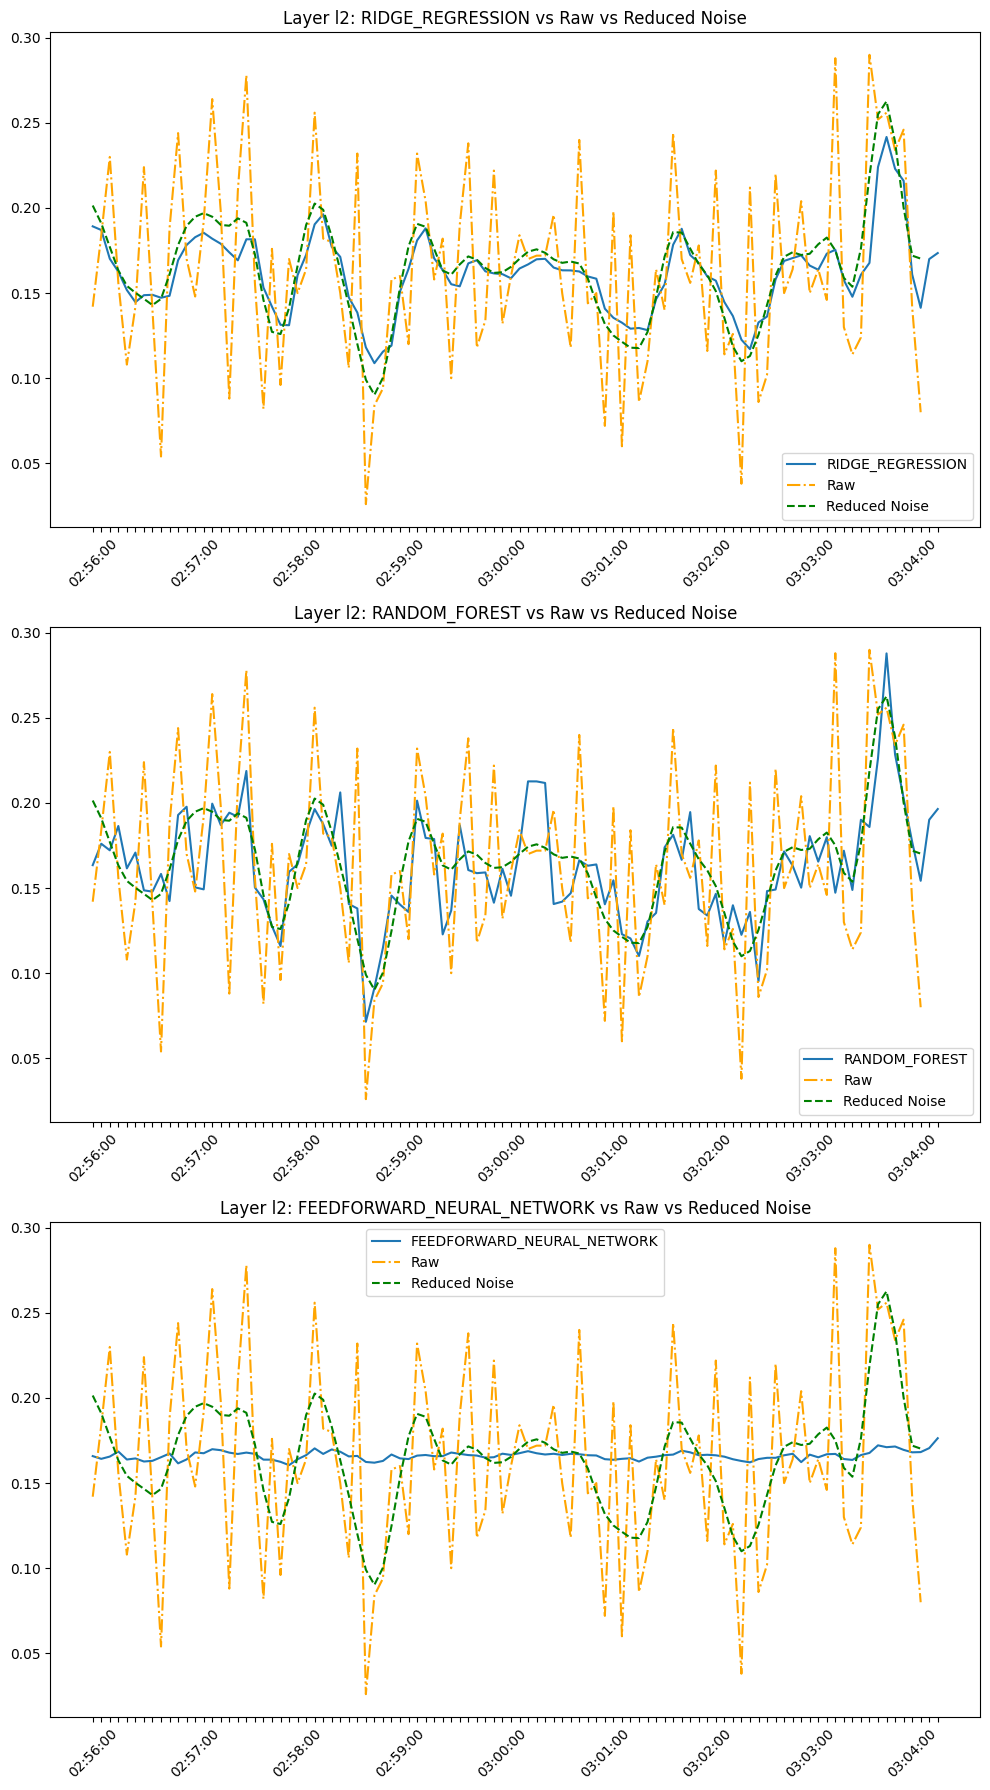

------------------


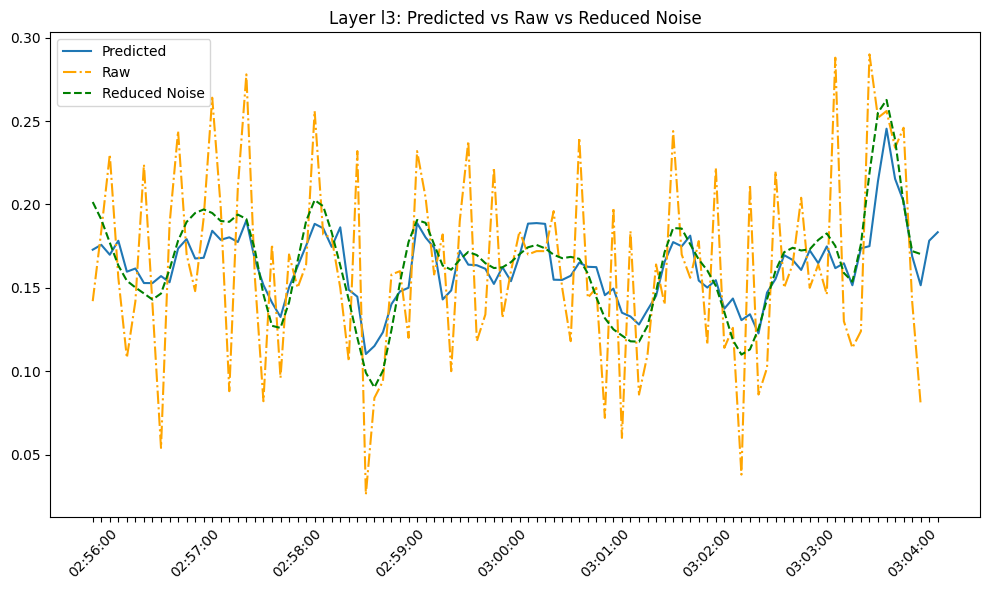

------------------


In [19]:
for key, df in dfs.items():
    # Plot the data
    fig, axes = plt.subplots(
        nrows=len(df.columns) - len(IGNORED_COLS), 
        figsize=(10, 6 * (len(df.columns) - len(IGNORED_COLS)))
        )

    # Ensure axes is always a list or array
    if not isinstance(axes, np.ndarray):
        axes = [axes]

    ax_idx = 0  # Separate index for accessing axes

    for column in df.columns:
        if column not in IGNORED_COLS:
            actual_label = 'Reduced Noise' if IS_FILTERED else 'Raw'
            actual_color = 'green' if IS_FILTERED else 'orange'
            axes[ax_idx].plot(df['FormattedTime'], df[column], label=column)
            if IS_FILTERED: axes[ax_idx].plot(df['FormattedTime'], df['Raw'], label='Raw', linestyle='-.', color='orange')  # Added this line to plot the Raw values
            axes[ax_idx].plot(df['FormattedTime'], df['Actual'], label=actual_label, linestyle='--', color=actual_color)

            # Sparse Tick Labels logic
            n = 12  # Display every n-th label 
            for index, label in enumerate(axes[ax_idx].xaxis.get_ticklabels()):
                if index % n != 0:
                    label.set_visible(False)

            # Rotate the visible x-axis labels
            axes[ax_idx].tick_params(axis='x', rotation=45)

            axes[ax_idx].legend()
            # axes[ax_idx].grid(True) # Uncomment this line to show grid lines
            title = f'Layer {key}: {column} vs Raw'
            if IS_FILTERED: title += ' vs Reduced Noise'
            axes[ax_idx].set_title(title)
            ax_idx += 1  # Increment ax_idx

    plt.tight_layout()
    plt.show()
    print("------------------")
